In [1]:
!pip install ipywidgets --quiet
from google.colab import output
output.enable_custom_widget_manager()

ModuleNotFoundError: No module named 'google'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output

# Even and Odd signals


*  ## Even signals
  These signals are symmetric with respect to vertical axis and can be mathematically represented as $x(t) = x(-t )$ for continusious time signals and $x(n) = x(-n )$ for discrete time signals.
*  ## Odd signals
  These are anti-symmetrric signals with respect to verticle axis and can be represented as $x(t) = -x(t)$ for continuous time and $x(n) = -x(n)$ for discrete time signals. For odd signals $x(0) = 0, ∀ t, n$

# Can you identify the even and odd signals?







In [7]:
def signal_plotter(signal, time=None):
  sns.set_theme(style="whitegrid")
  if time is None:
      t = np.linspace(-10, 10, 1000)
  else:
      t = time
  plt.figure(figsize=(10, 4))
  sns.lineplot(x=t, y=signal, color="blue")
  plt.xlabel("Time (t)")
  plt.ylabel("Amplitude")
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()
  # return t

In [ ]:
t=np.linspace(-10,10,1000)
signal_1= np.cos(2*np.pi*t) # Even
signal_2=np.sin(2*np.pi*t)      # Odd
signal_3=np.exp(-0.3*abs(t))      # Even
signal_4=t*np.exp(-0.3*abs(t))      # Odd
signal_5=np.heaviside(t,1)   # Odd

C:\Users\Kshitij Srivastava\AppData\Local\Temp\ipykernel_37224\2824060190.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


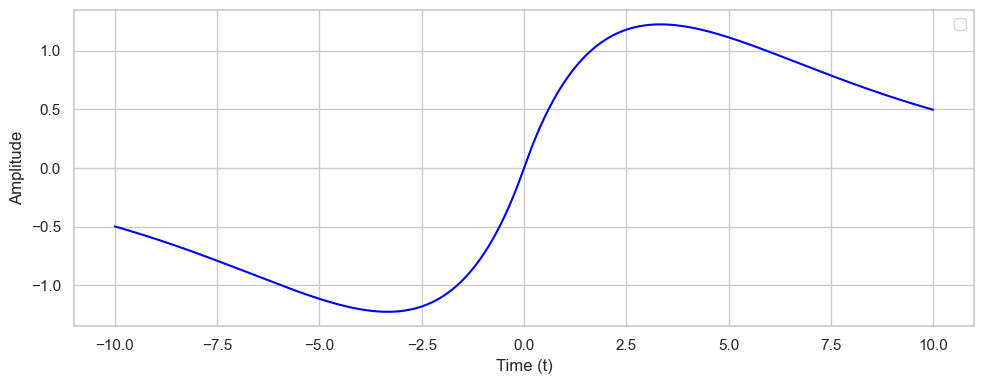

In [14]:
signal_plotter(signal_4)

# Properties of even and odd signals

1. ## Multiplication of signals
  *   Even x Even = Even
  *   Even x Odd = Odd
  *   Odd x Odd = Even
2. ## Derivative of signals

  *   If $x(t)$ is an even signal the $ \dfrac{\mathrm{d} x(t) }{\mathrm{d} x} = -\dfrac{\mathrm{d} x(-t) }{\mathrm{d} x}$
  *   If $x(t)$ is an odd signal the $ \dfrac{\mathrm{d} x(t) }{\mathrm{d} x} = \dfrac{\mathrm{d} x(-t) }{\mathrm{d} x}$

In [15]:
def signal_multiplier(signal1, signal2):
  signal_output=signal1*signal2
  signal_plotter(signal_output)

C:\Users\Kshitij Srivastava\AppData\Local\Temp\ipykernel_37224\2824060190.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


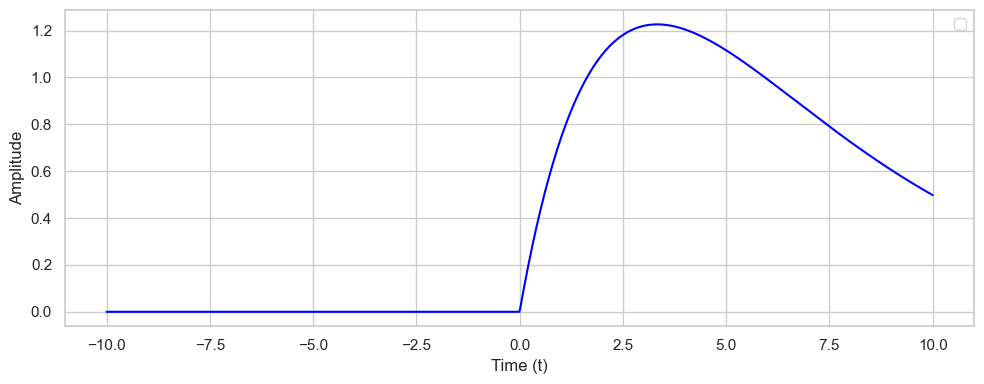

In [17]:
signal_multiplier(signal_4,signal_5)

In [18]:
def signal_differentiator(signal):
  signal_output = np.diff(signal)

  original_t = np.linspace(-10, 10, len(signal))

  t_diff = original_t[:len(signal_output)]

  signal_plotter(signal_output, t_diff)
  return signal_output

C:\Users\Kshitij Srivastava\AppData\Local\Temp\ipykernel_37224\2824060190.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


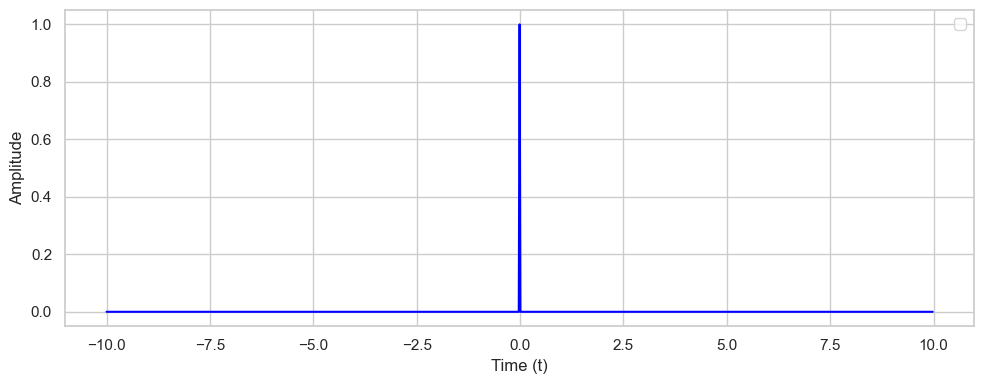

In [22]:
l=signal_differentiator(signal_5)

# Even and Odd decomposition of signals
## Continuous time signals
Every signal can be reprsented as a sum of even and odd signal components. For a signal $x(t)$ we can decompose it as $x(t) = x_{even}(t)+x_{odd}(t)$ where,

*   $x_{even}(t)=\frac{x(t)+x(-t)}{2}$
*   $x_{odd}(t)=\frac{x(t)-x(-t)}{2}$

## Discrete time signals
For discrete time signal $x(n)$ the signal can be decomposed as $x(n) = x_{even}(n)+x_{odd}(n)$ where,

*   $x_{even}(n)=\frac{x(n)+x(-n)}{2}$
*   $x_{odd}(t)=\frac{x(n)-x(-n)}{2}$


In [ ]:
sns.set_theme(style="whitegrid")

t = np.linspace(-10, 10, 1000)

'''This comment is to show the multi line comment in python and to tell about the
function defined below. The signal selector takes the argument name of the function and
returns the function'''
def signal_selector(name):
    if name == "Exponential Decay (Asymmetric)":
        return np.exp(-0.3 * t)
    elif name == "Cosine (Even)":
        return np.cos(2 * np.pi * t)
    elif name == "Sine (Odd)":
        return np.sin(2 * np.pi * t)
    elif name == "Step Function":
        return np.where(t >= 0, 1, 0)
    elif name == "t * exp(-|t|) (Odd Exponential)":
        return t * np.exp(-0.3 * np.abs(t))
    elif name == "|t| * exp(-|t|) (Even Exponential)":
        return np.abs(t) * np.exp(-0.3 * np.abs(t))
    elif name == "np.exp(-2*t)*np.cos(t)":
      return np.exp(-2*t)*np.cos(2* np.pi * t)
    else:
        return np.zeros_like(t)

def decompose_even_odd(x):
    x_rev = x[::-1]
    x_even = 0.5 * (x + x_rev)
    x_odd = 0.5 * (x - x_rev)
    threshold = 1e-10
    x_even[np.abs(x_even) < threshold] = 0
    x_odd[np.abs(x_odd) < threshold] = 0
    return x_even, x_odd

def plot_decomposition(signal_name):
    clear_output(wait=True)
    x = signal_selector(signal_name)
    x_even, x_odd = decompose_even_odd(x)

    plt.figure(figsize=(12, 3))
    sns.lineplot(x=t, y=x, label="Original Signal", color="black")
    plt.title(f"Original Signal: {signal_name}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 3))
    sns.lineplot(x=t, y=x_even, label="Even Component", color="blue")
    plt.title("Even Component")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 3))
    sns.lineplot(x=t, y=x_odd, label="Odd Component", color="red")
    plt.title("Odd Component")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

signal_dropdown = widgets.Dropdown(
    options=[
        "Exponential Decay (Asymmetric)",
        "Cosine (Even)",
        "Sine (Odd)",
        "Step Function",
        "t * exp(-|t|) (Odd Exponential)",
        "|t| * exp(-|t|) (Even Exponential)",
        "np.exp(-2*t)*np.cos(t)"
    ],
    description="Signal:"
)

'''The line below connects the widget and the function'''
widgets.interact(plot_decomposition, signal_name=signal_dropdown)

# Energy and power signals

## Energy of a signal
The energy of a signal is given by

*   Continuous time signals: $E_x = \int_{-∞}^{∞} |x(t)|^{2}dt$
*   Discrete time signals: $E_x = ∑_{-∞}^{∞} |x(n)|^{2}$

## Power of a signal
The power of a signla is the time average of energy and is given by

*   Continuous time signals: $P_x =  \lim_{ T\to ∞} \frac{1}{2T}\int_{-T}^{T} |x(t)|^{2}dt \\ $
*   Discrete time signals: $E_x = \lim_{ N\to ∞}\frac{1}{2N+1}∑_{-N}^{N} |x(n)|^{2}$

## Energy and power signals

*   Energy signals: Signals with finite energy

    *   $0<E_x<∞$ and $P_x = 0$
*   Power signals: Signals with finite power (infinite energy)

    *   $0<P_x<\infty$ and $E_x = \infty$

In [ ]:
sns.set(style="whitegrid")

t = np.linspace(-500, 500, 20000)

# Signal generator
def generate_signal(name):
    if name == "Exponential Decay":
        return np.exp(-0.3 * np.abs(t))
    elif name == "Sine Wave":
        return np.sin(2 * np.pi * 0.1 * t)
    elif name == "Cosine Wave":
        return np.cos(2 * np.pi * 0.1 * t)
    elif name == "Sinc Function":
        return np.sinc(t / np.pi)
    elif name == "Rectangular Pulse":
        return np.where(np.abs(t) <= 5, 1, 0)
    elif name == "Unit Step":
        return np.where(t >= 0, 1, 0)
    elif name == "Ramp Function":
        return np.where(t >= 0, t, 0)
    elif name == "Mod of sine":
        return np.abs(t*np.sin(0.2* np.pi * t))
    else:
        return np.zeros_like(t)

# Energy and power calculations
def compute_energy(x, t):
    dt = t[1] - t[0]
    return np.sum(np.abs(x)**2) * dt

def compute_power(x, t):
    energy = compute_energy(x, t)
    T = (t[-1] - t[0]) / 2
    return energy / (2 * T)

# Classifier
def classify_signal(energy, power, energy_thresh=100, power_thresh=1e-1):
    """
    Classifies a signal based on approximate energy and power.
    """
    is_energy_finite = energy < energy_thresh
    is_power_zero = power < power_thresh
    is_power_finite = power_thresh < power < energy_thresh

    if is_energy_finite and is_power_zero:
        return "Energy Signal"
    elif not is_energy_finite and is_power_finite:
        return "Power Signal"
    else:
        return "Neither Energy nor Power"

def analyze_signal(signal_name):
    clear_output(wait=True)
    x = generate_signal(signal_name)
    energy = compute_energy(x, t)
    power = compute_power(x, t)
    category = classify_signal(energy, power)

    plt.figure(figsize=(12, 4))
    sns.lineplot(x=t, y=x, color="purple", label=signal_name)
    plt.title(f"{signal_name} — {category}")
    plt.xlabel("Time (t)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f" Energy ≈ {energy:.3f}")
    print(f" Average Power ≈ {power:.3f}")
    print(f" Classification: **{category}**")

signal_dropdown = widgets.Dropdown(
    options=[
        "Exponential Decay",
        "Sine Wave",
        "Cosine Wave",
        "Sinc Function",
        "Rectangular Pulse",
        "Unit Step",
        "Ramp Function",
        "Mod of sine"
    ],
    description="Signal:"
)

widgets.interact(analyze_signal, signal_name=signal_dropdown)

interactive(children=(Dropdown(description='Signal:', options=('Exponential Decay', 'Sine Wave', 'Cosine Wave'…

<function __main__.analyze_signal(signal_name)>

# System analysis
A system can be characterized by an impulse function function and produces an output for a given input signal represented by $x(t) \mapsto y(t)$. Examples of physical system can range from a radar system to braking system for cars. To begin with we will probe the system behaviour for few input signals.

In [ ]:
sns.set(style="whitegrid")

t = np.linspace(-5, 5, 2000)
dt = t[1] - t[0]

def get_impulse_response(type, t):
    if type == "Exponential Decay (e^{-t}u(t))":
        return np.exp(-t) * (t >= 0)
    elif type == "Rectangular Pulse":
        return ((t >= 0) & (t <= 1)).astype(float)
    elif type == "Sine Response (sin(2πt)u(t))":
        return np.sin(2 * np.pi * t) * (t >= 0)
    elif type == "Delta-like (Identity System)":
        h = np.zeros_like(t)
        h[np.abs(t) < 0.005] = 1 / 0.01
        return h

def get_input_signal(signal_type):
    x = np.zeros_like(t)
    if signal_type == "Unit Impulse (δ(t))":
        x[np.abs(t) < 0.005] = 1 / 0.01
    elif signal_type == "Delayed Impulse (δ(t-1))":
        x[np.abs(t - 1) < 0.005] = 1 / 0.01
    elif signal_type == "Unit Step (u(t))":
        x = (t >= 0).astype(float)
    elif signal_type == "Rectangular Pulse":
        x = ((t >= -1) & (t <= 1)).astype(float)
    elif signal_type == "Sine Wave (sin(2πt))":
        x = np.sin(2 * np.pi * t)
    elif signal_type == "Exponential Decay (e^{-t}u(t))":
        x = np.exp(-t) * (t >= 0)
    return x

def system_response(x, h):
    return np.convolve(x, h, mode='same') * dt

def is_impulse_like(name):
    return "Impulse" in name or "Delta" in name

def visualize_system(signal_type, system_type):
    clear_output(wait=True)

    x = get_input_signal(signal_type)
    h = get_impulse_response(system_type, t)
    y = system_response(x, h)

    fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

    if is_impulse_like(signal_type):
        axs[0].bar(t, x, width=0.02, color="red")
    else:
        sns.lineplot(x=t, y=x, ax=axs[0], color="blue")
    axs[0].set_title(f"Input Signal: {signal_type}")
    axs[0].grid(True)

    if is_impulse_like(system_type):
        axs[1].bar(t, h, width=0.02, color="black")
    else:
        sns.lineplot(x=t, y=h, ax=axs[1], color="orange")
    axs[1].set_title(f"Impulse Response h(t): {system_type}")
    axs[1].grid(True)

    sns.lineplot(x=t, y=y, ax=axs[2], color="green")
    axs[2].set_title("System Output y(t)")
    axs[2].set_xlabel("Time (t)")
    axs[2].grid(True)

    plt.tight_layout()
    plt.show()

input_options = [
    "Unit Impulse (δ(t))",
    "Delayed Impulse (δ(t-1))",
    "Unit Step (u(t))",
    "Rectangular Pulse",
    "Sine Wave (sin(2πt))",
    "Exponential Decay (e^{-t}u(t))"
]

impulse_options = [
    "Exponential Decay (e^{-t}u(t))",
    "Rectangular Pulse",
    "Sine Response (sin(2πt)u(t))",
    "Delta-like (Identity System)"
]

ui = widgets.interactive(
    visualize_system,
    signal_type=widgets.Dropdown(options=input_options, description="Input:"),
    system_type=widgets.Dropdown(options=impulse_options, description="System:")
)

display(ui)


interactive(children=(Dropdown(description='Input:', options=('Unit Impulse (δ(t))', 'Delayed Impulse (δ(t-1))…

# Linear vs Non-Linear systems
We will look into the system properties based on the way system interacts with an input signal. We will start by lookinf at the linearity vs non-linearity property of systems.

## Linear system
A linear system is the one on which the superposition property can be appliied. Superposition principle is based on two rules

*   Additivity: If $x_1(t) ↦ y_1(t)$ and $x_2(t) ↦ y_2(t)$ then $x_1(t)+x_2(t) ↦ y_1(t)+y_2(t)$
*   Homogeneity: If  $x(t) ↦ y(t)$ then $\alpha x(t) ↦ \alpha y(t)$

The superposition principal for a system can be summerized as,

If $\alpha x_1(t) ↦ \alpha y_1(t)$ and $\beta x_2(t) ↦ \beta y_2(t)$ then $\alpha x_1(t)+\beta x_2(t) ↦ \alpha y_1(t)+\beta y_2(t)$

## Similarly for a discrete time system

If $\alpha x_1(n) ↦ \alpha y_1(n)$ and $\beta x_2(n) ↦ \beta y_2(n)$ then $\alpha x_1(n)+\beta x_2(n) ↦ \alpha y_1(n)+\beta y_2(n)$

## Summay

If we consider a system as a transform $T$, then for a linear system, $T(\alpha x_1+\beta x_2) \mapsto \alpha  T(x_1)+\beta T(x_2)$.

For a non linear system, $T(\alpha x_1+\beta x_2) \not \mapsto \alpha  T(x_1)+\beta T(x_2)$.



In [ ]:
sns.set(style="whitegrid")

t = np.linspace(-5, 5, 1000)

def generate_input(signal_type):
    if signal_type == "Sine Wave":
        return np.sin(2 * np.pi * t)
    elif signal_type == "Unit Step":
        return (t >= 0).astype(float)
    elif signal_type == "Rectangular Pulse":
        return ((t >= -1) & (t <= 1)).astype(float)
    elif signal_type == "Exponential Decay":
        return np.exp(-t) * (t >= 0)
    elif signal_type == "Linear Ramp":
        return t * (t >= 0)
    return np.zeros_like(t)

def linear_system(x):
    return 2 * x

def nonlinear_system(x):
    return x ** 2

def visualize_linear_vs_nonlinear(input1_type, input2_type, alpha=1.0, beta=1.0):
    clear_output(wait=True)

    x1 = generate_input(input1_type)
    x2 = generate_input(input2_type)

    x_combined = alpha * x1 + beta * x2

    y1_linear = linear_system(x1)
    y2_linear = linear_system(x2)
    y_combined_linear = linear_system(x_combined)
    y_sum_linear = alpha * y1_linear + beta * y2_linear

    y1_nl = nonlinear_system(x1)
    y2_nl = nonlinear_system(x2)
    y_combined_nl = nonlinear_system(x_combined)
    y_sum_nl = alpha * y1_nl + beta * y2_nl

    fig, axs = plt.subplots(3, 2, figsize=(14, 10), sharex=True)

    sns.lineplot(x=t, y=x1, ax=axs[0, 0], label="x₁(t)", color="blue")
    sns.lineplot(x=t, y=x2, ax=axs[0, 0], label="x₂(t)", color="green")
    sns.lineplot(x=t, y=x_combined, ax=axs[0, 1], label="αx₁ + βx₂", color="purple")
    axs[0, 0].set_title("Individual Inputs")
    axs[0, 1].set_title("Combined Input")
    axs[0, 0].grid(True)
    axs[0, 1].grid(True)

    sns.lineplot(x=t, y=y_sum_linear, ax=axs[1, 0], label="αy₁ + βy₂", color="orange")
    sns.lineplot(x=t, y=y_combined_linear, ax=axs[1, 1], label="y(αx₁ + βx₂)", color="red")
    axs[1, 0].set_title("Linear System: Sum of Outputs")
    axs[1, 1].set_title("Linear System: Output of Sum")
    axs[1, 0].grid(True)
    axs[1, 1].grid(True)

    sns.lineplot(x=t, y=y_sum_nl, ax=axs[2, 0], label="αy₁ + βy₂", color="orange")
    sns.lineplot(x=t, y=y_combined_nl, ax=axs[2, 1], label="y(αx₁ + βx₂)", color="red")
    axs[2, 0].set_title("Non-Linear System: Sum of Outputs")
    axs[2, 1].set_title("Non-Linear System: Output of Sum")
    axs[2, 0].grid(True)
    axs[2, 1].grid(True)

    plt.tight_layout()
    plt.show()

signal_types = ["Sine Wave", "Unit Step", "Rectangular Pulse", "Exponential Decay", "Linear Ramp"]

ui = widgets.interactive(
    visualize_linear_vs_nonlinear,
    input1_type=widgets.Dropdown(options=signal_types, value="Sine Wave", description="x₁(t):"),
    input2_type=widgets.Dropdown(options=signal_types, value="Unit Step", description="x₂(t):"),
    alpha=widgets.FloatSlider(value=1.0, min=-2.0, max=2.0, step=0.1, description="α:"),
    beta=widgets.FloatSlider(value=1.0, min=-2.0, max=2.0, step=0.1, description="β:")
)

display(ui)

interactive(children=(Dropdown(description='x₁(t):', options=('Sine Wave', 'Unit Step', 'Rectangular Pulse', '…

# Time invariant system

A system is time invariant if its behaviour does not change with time. This can be checked by applying time delayed input and checking the corresponding time delayed output. Mathematically a time invariant system can be be represented by,

if $x(t) ↦ y(t)$ then for a time delay $t_o$ $x(t-t_o) ↦ y(t-t_o)$

For a discrete time system

if $x(n) ↦ y(n)$ then for a time delay $n_o$ $x(t-n_o) ↦ y(t-n_o)$


In [ ]:
sns.set(style="whitegrid")

t = np.linspace(-5, 5, 1000)

def generate_input(signal_type):
    if signal_type == "Sine Wave":
        return np.sin(2 * np.pi * t)
    elif signal_type == "Rectangular Pulse":
        return ((t >= -1) & (t <= 1)).astype(float)
    elif signal_type == "Exponential Decay":
        return np.exp(-t) * (t >= 0)
    elif signal_type == "Ramp":
        return t * (t >= 0)
    elif signal_type == "Gaussian":
        return np.exp(-t**2)
    return np.zeros_like(t)

def time_invariant_system(x):
    return x**2

def time_varying_system(x):
    return t * x

def visualize_ti_vs_tv(signal_type, shift):
    clear_output(wait=True)

    x = generate_input(signal_type)
    x_shifted = np.interp(t, t - shift, x)  # shift signal using interpolation

    y = time_invariant_system(x)
    y_shifted = np.interp(t, t - shift, y)
    y_of_shifted = time_invariant_system(x_shifted)

    y_tv = time_varying_system(x)
    y_tv_shifted = np.interp(t, t - shift, y_tv)
    y_tv_of_shifted = time_varying_system(x_shifted)

    fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharex=True)

    sns.lineplot(x=t, y=y_shifted, ax=axs[0, 0], label="Shift output", color="red")
    sns.lineplot(x=t, y=y_of_shifted, ax=axs[0, 1], label="Output of shifted input", color="blue")
    axs[0, 0].set_title("TI System: y(t - τ)")
    axs[0, 1].set_title("TI System: y_shifted(t)")
    axs[0, 0].grid(True)
    axs[0, 1].grid(True)

    sns.lineplot(x=t, y=y_tv_shifted, ax=axs[1, 0], label="Shift output", color="red")
    sns.lineplot(x=t, y=y_tv_of_shifted, ax=axs[1, 1], label="Output of shifted input", color="blue")
    axs[1, 0].set_title("TV System: y(t - τ)")
    axs[1, 1].set_title("TV System: y_shifted(t)")
    axs[1, 0].grid(True)
    axs[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

signal_options = ["Sine Wave", "Rectangular Pulse", "Exponential Decay", "Ramp", "Gaussian"]

ui = widgets.interactive(
    visualize_ti_vs_tv,
    signal_type=widgets.Dropdown(options=signal_options, value="Rectangular Pulse", description="Input:"),
    shift=widgets.FloatSlider(value=1.0, min=-3.0, max=3.0, step=0.1, description="Time Shift (τ):")
)

display(ui)


interactive(children=(Dropdown(description='Input:', index=1, options=('Sine Wave', 'Rectangular Pulse', 'Expo…

# Causal system

A causal system is a one in which the output can only depend on past and the present input only. Mathematically for a causal system,

$x_1(t) = x_2(t), t\leq t_o$ then $y_1(t) = y_2(t), \ t\leq t_o$.

For a discrete time system, $x_1(n) = x_2(n), n\leq n_o$ then $y_1(n) = y_2(n), \  n\leq n_o$.


In [ ]:
sns.set(style="whitegrid")

t = np.linspace(-5, 5, 1000)
dt = t[1] - t[0]

def generate_input(signal_type):
    if signal_type == "Unit Step":
        return (t >= 0).astype(float)
    elif signal_type == "Exponential Decay":
        return np.exp(-t) * (t >= 0)
    elif signal_type == "Gaussian":
        return np.exp(-t**2)
    elif signal_type == "Sine Wave":
        return np.sin(2 * np.pi * t)
    elif signal_type == "Rectangular Pulse":
        return ((t >= -1) & (t <= 1)).astype(float)
    return np.zeros_like(t)


'''Can anyone tell what system it is?'''
def causal_system(x):
    y = np.zeros_like(x)
    for i in range(len(x)):
        y[i] = np.mean(x[:i+1])
    return y

'''Tell what system it is'''
def noncausal_system(x):
    kernel_size = 21
    pad = kernel_size // 2
    x_padded = np.pad(x, (pad, pad), mode='edge')
    y = np.convolve(x_padded, np.ones(kernel_size)/kernel_size, mode='valid')
    return y

def visualize_causal_vs_noncausal(signal_type):
    clear_output(wait=True)

    x = generate_input(signal_type)
    y_causal = causal_system(x)
    y_noncausal = noncausal_system(x)

    plt.figure(figsize=(12, 6))
    sns.lineplot(x=t, y=x, label="Input Signal", color="blue")
    sns.lineplot(x=t, y=y_causal, label="Causal System Output", color="green")
    sns.lineplot(x=t, y=y_noncausal, label="Non-Causal System Output", color="red")
    plt.title("Causal vs. Non-Causal System Output")
    plt.xlabel("Time (t)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

signal_options = ["Unit Step", "Exponential Decay", "Gaussian", "Sine Wave", "Rectangular Pulse"]

ui = widgets.interactive(
    visualize_causal_vs_noncausal,
    signal_type=widgets.Dropdown(options=signal_options, value="Exponential Decay", description="Input:")
)

display(ui)


interactive(children=(Dropdown(description='Input:', index=1, options=('Unit Step', 'Exponential Decay', 'Gaus…

# Stable systems
A system is stable if for a bounded input, the system produces a bounded output. This is called as **Bounded Input Bounded Output (BIBO)** system. Mathematically, $|x(t)| \leq B_x \leq ∞ \Rightarrow |y(t)| \leq B_x \leq ∞ $

In [ ]:
sns.set(style="whitegrid")

t = np.linspace(0, 10, 1000)
dt = t[1] - t[0]

def generate_input(signal_type):
    if signal_type == "Unit Step":
        return np.ones_like(t)
    elif signal_type == "Bounded Sine Wave":
        return np.sin(2 * np.pi * t)
    elif signal_type == "Exponential Growth":
        return np.exp(t - 5)  # Shifted to avoid large values at t=0
    elif signal_type == "Ramp":
        return t
    elif signal_type == "Decaying Sine":
        return np.sin(2 * np.pi * t) * np.exp(-t)
    return np.zeros_like(t)

def stable_system(x):
    h = np.exp(-t)
    y = np.convolve(x, h, mode='full')[:len(t)] * dt
    return y

def unstable_system(x):
    h = np.exp(t - 5)
    y = np.convolve(x, h, mode='full')[:len(t)] * dt
    return y

def visualize_bibo(signal_type, system_type):
    clear_output(wait=True)

    x = generate_input(signal_type)
    y = stable_system(x) if system_type == "Stable System" else unstable_system(x)

    plt.figure(figsize=(12, 6))
    sns.lineplot(x=t, y=x, label="Input Signal", color="blue")
    sns.lineplot(x=t, y=y, label="Output Signal", color="red")
    plt.title(f"{system_type} Response to '{signal_type}' Input")
    plt.xlabel("Time (t)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

input_options = ["Unit Step", "Bounded Sine Wave", "Exponential Growth", "Ramp", "Decaying Sine"]
system_options = ["Stable System", "Unstable System"]

ui = widgets.interactive(
    visualize_bibo,
    signal_type=widgets.Dropdown(options=input_options, value="Bounded Sine Wave", description="Input:"),
    system_type=widgets.RadioButtons(options=system_options, value="Stable System", description="System:")
)

display(ui)


interactive(children=(Dropdown(description='Input:', index=1, options=('Unit Step', 'Bounded Sine Wave', 'Expo…

Note that for the stable system if input is Sine the output is also Sine. This shows that the output is also Sine. So this shows that as the system (which is a decaying exponential) is LTI the Sine signals are its eigen function.

# Invertibility of systems

*   If we consider the system as a transform $T: x(t) ↦ y(t)$, then a system is invertible if the mapping is bijective (one-one and onto).
*  For an invertible system, we can build an inverse system which such that $T^{-1}: y(t) ↦ x(t)$

In [ ]:
sns.set(style="whitegrid")

t = np.linspace(-5, 5, 1000)

def generate_input(signal_type):
    if signal_type == "Sine Wave":
        return np.sin(2 * np.pi * t)
    elif signal_type == "Exponential":
        return np.exp(-t**2)
    elif signal_type == "Linear Ramp":
        return t
    elif signal_type == "Step":
        return np.heaviside(t, 1)
    return np.zeros_like(t)

def system_output(x, system_type):
    if system_type == "Invertible: y(t) = 2x(t)":
        y = 2 * x
        x_recovered = y / 2
    elif system_type == "Invertible: y(t) = x(t - 1)":
        shift = int(len(t) * 1 / 10)  # delay by 10% of t-range
        y = np.roll(x, shift)
        x_recovered = np.roll(y, -shift)
    elif system_type == "Non-Invertible: y(t) = x²(t)":
        y = x**2
        x_recovered = None  # No inverse
    elif system_type == "Non-Invertible: y(t) = |x(t)|":
        y = np.abs(x)
        x_recovered = None  # No inverse
    else:
        y = x
        x_recovered = x
    return y, x_recovered

def visualize_invertibility(input_type, system_type):
    clear_output(wait=True)

    x = generate_input(input_type)
    y, x_rec = system_output(x, system_type)

    fig, axs = plt.subplots(3, 1, figsize=(12, 9), sharex=True)

    sns.lineplot(x=t, y=x, ax=axs[0], color='blue')
    axs[0].set_title("Original Input Signal")

    sns.lineplot(x=t, y=y, ax=axs[1], color='red')
    axs[1].set_title(f"System Output: {system_type}")

    if x_rec is not None:
        sns.lineplot(x=t, y=x_rec, ax=axs[2], color='green')
        axs[2].set_title("Recovered Input (via inverse system)")
    else:
        axs[2].text(0.5, 0.5, "No Inverse: System is Non-Invertible",
                    ha='center', va='center', fontsize=14, transform=axs[2].transAxes)
        axs[2].set_title("Recovered Input (Not Defined)")
        axs[2].set_ylim(-1, 1)

    for ax in axs:
        ax.grid(True)
        ax.set_ylabel("Amplitude")
    axs[2].set_xlabel("Time (t)")

    plt.tight_layout()
    plt.show()

input_options = ["Sine Wave", "Exponential", "Linear Ramp", "Step"]
system_options = [
    "Invertible: y(t) = 2x(t)",
    "Invertible: y(t) = x(t - 1)",
    "Non-Invertible: y(t) = x²(t)",
    "Non-Invertible: y(t) = |x(t)|"
]

ui = widgets.interactive(
    visualize_invertibility,
    input_type=widgets.Dropdown(options=input_options, value="Sine Wave", description="Input:"),
    system_type=widgets.Dropdown(options=system_options, value="Invertible: y(t) = 2x(t)", description="System:")
)

display(ui)


interactive(children=(Dropdown(description='Input:', options=('Sine Wave', 'Exponential', 'Linear Ramp', 'Step…

# Question
**Q.** Consider the system defined by the impulse response:  
$$
h[n] = (0.5)^n u[n]
$$  
where $u[n]$ is the unit step function.

**(a)** Plot the impulse response $h[n]$ for $n = 0$ to $20$.

**(b)** Consider an input signal:  
$$
x[n] =
\begin{cases}
1, & 0 \leq n \leq 5 \\
0, & \text{otherwise}
\end{cases}
$$  
Compute the system output $y[n] = x[n] * h[n]$ using discrete convolution.

**(c)** Plot the input $x[n]$, the impulse response $h[n]$, and the output $y[n]$ on the same figure using subplots.

**(d)** Comment on whether the system is **stable** and **causal**.


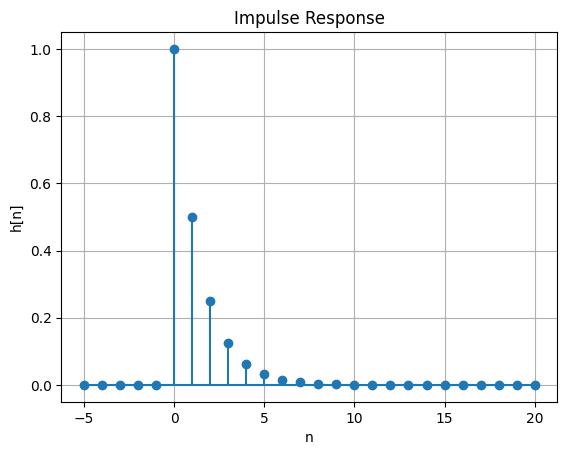

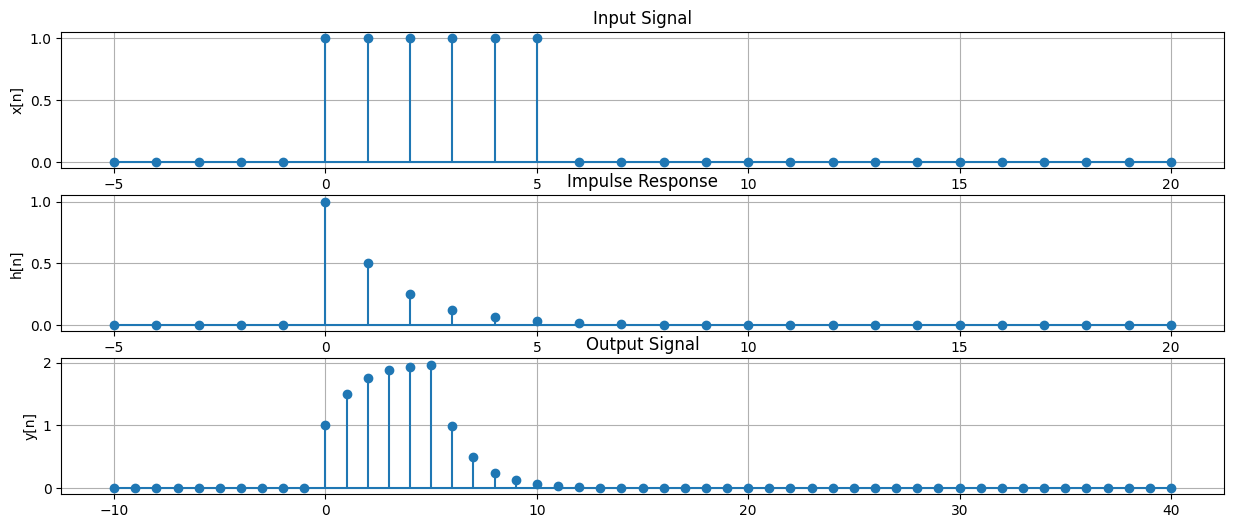

In [9]:
## write your answer here
import numpy as np
import matplotlib.pyplot as plt

# Part (a)
n = np.arange(-5,21)
h = np.zeros_like(n, dtype=float)

for i, val in enumerate(n):
    if 0 <= val <= 20:
        h[i] = (0.5 ** val) * (val >= 0)

plt.stem(n, h, basefmt="")
plt.grid(True)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('Impulse Response')

#Part (b)
x = np.zeros_like(n, dtype=float)
for i,val in enumerate(n):
    if 0 <= val <= 5:
        x[i] = 1

y = np.convolve(x , h) #Discrete Convolution

#Part (c)
plt.figure(figsize=(15,6))

plt.subplot(3, 1,1)
plt.stem(n, x, basefmt="")
plt.grid(True)
plt.ylabel('x[n]')
plt.title('Input Signal')

plt.subplot(3, 1,2)
plt.stem(n, h, basefmt="")
plt.grid(True)
plt.ylabel('h[n]')
plt.title('Impulse Response')

n_y = np.arange(-10,41)
plt.subplot(3, 1,3)
plt.stem(n_y, y, basefmt="")
plt.grid(True)
plt.ylabel('y[n]')
plt.title('Output Signal')

plt.show()

#Part (d)
# System is stable as bounded input produced bounded output as evident from the curves
# System is causal as impulse response as h[n] = 0 for n < 0
